In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-09.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-16.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-11.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-10.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-01.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-09.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-F-17.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-17.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-20.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S-7-G-05.tif
/kaggle/input/handwritten-signature-datasets/BHSig260-Hindi/BHSig260-Hindi/7/H-S

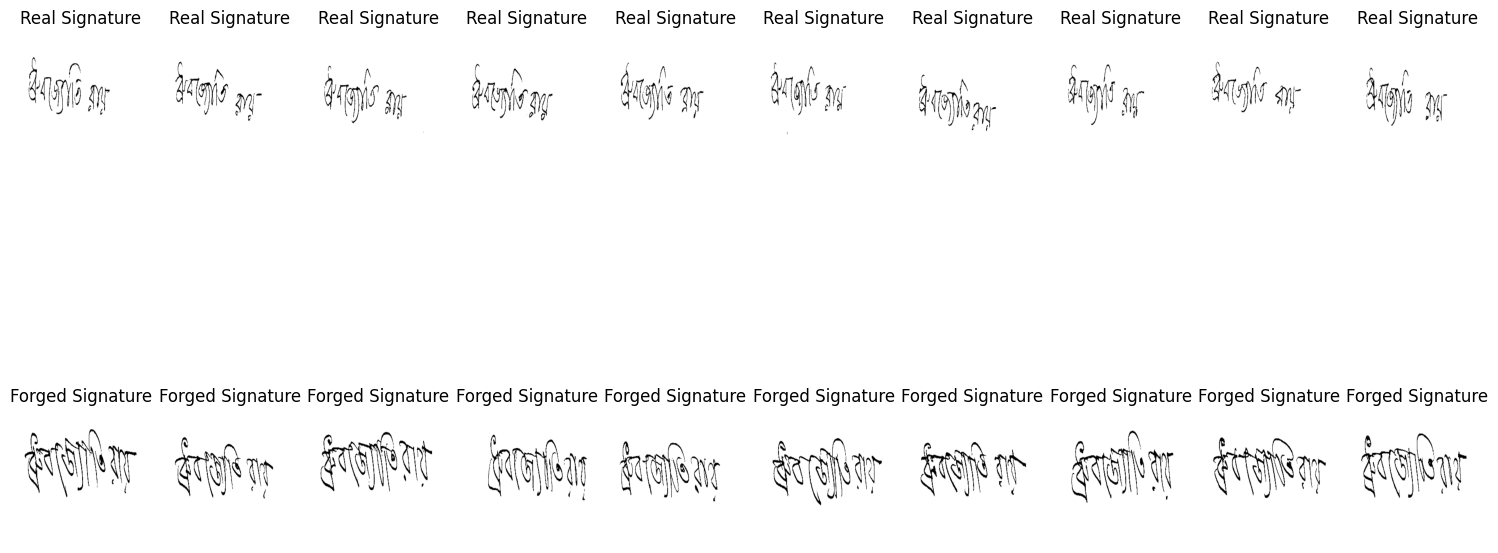

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path containing both real and forged signatures
signatures_path = "/kaggle/input/handwritten-signature-datasets/BHSig260-Bengali/BHSig260-Bengali/1"
def display_images_from_folder(folder_path, num_images=10):
    """Display real and forged images from a specified folder."""
    images = os.listdir(folder_path)  # Get all images in the folder
    
    real_images = [img for img in images if "G" in img]  # Filter images with "G" (Genuine/Real)
    forged_images = [img for img in images if "F" in img]  # Filter images with "F" (Forged)

    plt.figure(figsize=(15, 10))  # Adjust figure size as needed
    
    # Display a specified number of real and forged images
    for i, (real_img, forged_img) in enumerate(zip(real_images[:num_images], forged_images[:num_images])):
        # Display real signature
        real_img_path = os.path.join(folder_path, real_img)
        real_img_data = cv2.imread(real_img_path)
        
        if real_img_data is not None:
            real_img_data = cv2.resize(real_img_data, (299, 299))  # Resize if necessary
            plt.subplot(2, num_images, i + 1)
            plt.imshow(cv2.cvtColor(real_img_data, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Real Signature")
        
        # Display forged signature
        forged_img_path = os.path.join(folder_path, forged_img)
        forged_img_data = cv2.imread(forged_img_path)
        
        if forged_img_data is not None:
            forged_img_data = cv2.resize(forged_img_data, (299, 299))  # Resize if necessary
            plt.subplot(2, num_images, i + 1 + num_images)  # Adjust subplot index for the second row
            plt.imshow(cv2.cvtColor(forged_img_data, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title("Forged Signature")
    
    plt.tight_layout()  # Adjust layout
    plt.show()

# Display real and forged signatures from the same folder
display_images_from_folder(signatures_path, num_images=10)


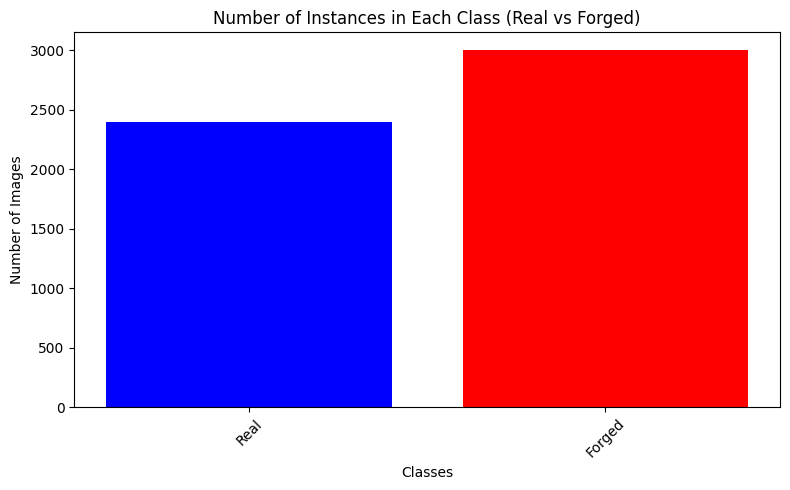

In [4]:
import os
import matplotlib.pyplot as plt

# Define the path where images are stored (both real and forged)
train_path = "/kaggle/input/handwritten-signature-datasets/BHSig260-Bengali/BHSig260-Bengali"

def count_images_in_classes(base_path):
    """Count the number of real and forged images based on filename logic."""
    real_count = 0
    forged_count = 0
    
    # Iterate through all the files in the base directory
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            # Iterate through images in each folder
            for img_name in os.listdir(folder_path):
                # Check if the image name contains 'G' (Real) or 'F' (Forged)
                if 'G' in img_name:  
                    real_count += 1
                elif 'F' in img_name:  
                    forged_count += 1
    
    return real_count, forged_count

# Get counts of real and forged signatures
real_count, forged_count = count_images_in_classes(train_path)

# Visualization
classes = ['Real', 'Forged']
counts = [real_count, forged_count]

plt.figure(figsize=(8, 5))
plt.bar(classes, counts, color=['blue', 'red'])
plt.title('Number of Instances in Each Class (Real vs Forged)')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()


Using GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.6837 - loss: 0.5962 - val_accuracy: 0.4725 - val_loss: 1.1090
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 875ms/step - accuracy: 0.8628 - loss: 0.3015 - val_accuracy: 0.6450 - val_loss: 0.6964
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 896ms/step - accuracy: 0.8943 - loss: 0.2424 - val_accuracy: 0.5450 - val_loss: 1.2784
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 873ms/step - accuracy: 0.9476 - loss: 0.1406 - val_accuracy: 0.6575 - val_loss: 0.9184
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 892ms/step - accuracy: 0.9506 - loss: 0.1175 - val_accuracy: 0.8450 - val_loss: 0.4166
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 880ms/step - accuracy: 0.9430 - loss: 0.1390 - val_accuracy: 0.8950 - val_loss: 0.3177
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 878ms/step - accuracy: 0.9700 - loss: 0.0797 - val_accuracy: 0.9125 - val_loss: 0.3005
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 883ms/step - accuracy: 0.9676 - loss: 0.0881 - val_accuracy: 0.7700 -

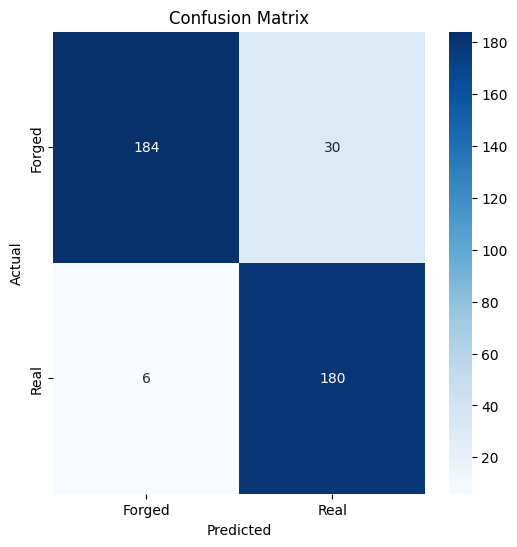

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf

# Check if GPU is available and set it as the default device
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Using GPU:", gpus)
    except RuntimeError as e:
        print(e)

# Parameters
IMG_SIZE = 299  # Xception input size
BATCH_SIZE = 32
EPOCHS = 10
max_images_per_class = 20 # Limit the number of images loaded per class (set a lower number if needed)

# Load dataset with limited number of images
def load_dataset(dataset_path, max_images_per_class):
    images = []
    labels = []
    
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if os.path.isdir(folder_path):
            # Iterate over images in the folder
            file_list = os.listdir(folder_path)[:max_images_per_class]  # Cap the number of files loaded
            for file_name in file_list:
                file_path = os.path.join(folder_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:  # Check if image is loaded correctly
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    img = img / 255.0  # Normalize the image
                    # Classify based on 'G' (genuine/real) or 'F' (forged) in filename
                    if 'G' in file_name:
                        label = 1  # Genuine/Real
                    elif 'F' in file_name:
                        label = 0  # Forged
                    else:
                        continue  # Skip if neither 'G' nor 'F' in the filename
                    images.append(img)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# Load all images from the dataset
images, labels = load_dataset("/kaggle/input/handwritten-signature-datasets/BHSig260-Bengali/BHSig260-Bengali", max_images_per_class)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Model architecture
base_model = Xception(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Training the model with limited images
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Forged', 'Real'], yticklabels=['Forged', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


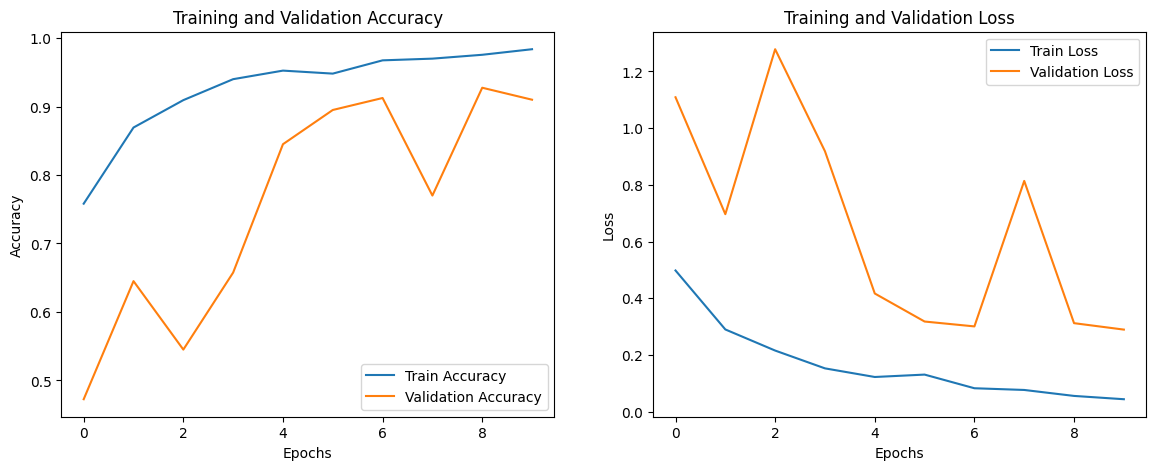

In [6]:
def plot_training_history(history):
    # Plotting accuracy
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)